In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import altair as alt

import folium
from urllib.request import urlopen
import matplotlib as mpl
import matplotlib.patches as mpatches
from folium import plugins

In [3]:
baixas_all = pd.read_csv('dataframes/baixas_all.csv')
df_companies = pd.read_csv('dataframes/companies_gender_data.csv')
df_work = pd.read_csv('dataframes/df_work.csv')
df_size = pd.read_csv('dataframes/organization_dimension.csv')
df_region = pd.read_csv('dataframes/organization_region.csv')
reducao_atividade_byday = pd.read_csv('dataframes/reducao_atividade_byday.csv')
despedimentos = pd.read_csv('dataframes/despedimentos.csv')

### Nº de Baixas Por Isolamento

In [11]:
base = alt.Chart(baixas_all).mark_bar().encode(
    x='DATA',
).properties(
    width=850
)
red = alt.value('#f54242')
base.encode(y='ACUMULADOS').properties(title='Acumulados') #| base.encode(y='POR DIA').properties(title='Por dia

alt.Chart(...)

In [12]:
base.encode(y='POR DIA').properties(title='Por dia')

alt.Chart(...)

### Layoff – Estim. - CAE,Dim,Dist

2.1  Data Analysis by Work Sectors and Genders

In [17]:
#Calculate the proportion of the layoff by sector
df_setor=df_companies[['Setor','Nº NISS_EE']]
df_setor.reset_index()

#Calculate the percentage of sectors affected
total_setor=sum(df_setor['Nº NISS_EE'])
df_setor['Percentual(%)']=[(float(value) / total_setor) for value in df_setor['Nº NISS_EE']]
df_setor['Percentual(%)']=df_setor['Percentual(%)']*100
df_setor['Percentual(%)']=df_setor['Percentual(%)'].round(3)
df_setor

C:\Users\Ana\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Ana\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ana\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,Setor,Nº NISS_EE,Percentual(%)
0,"Alojamento, restauração e similares",25455,22.484
1,Comércio por grosso e a retalho; reparação de ...,25223,22.279
2,Indústrias transformadoras,11306,9.986
3,Actividades de saúde humana e apoio social,7922,6.997
4,Transportes e armazenagem,6519,5.758
5,Outras actividades de serviços,5601,4.947
6,PESSOAS SINGULARES COM TRABALHADORES A CARGO,5435,4.801
7,"Actividades de consultoria, científicas, técni...",5296,4.678
8,"Actividades artísticas, de espectáculos, despo...",4543,4.013
9,Construção,3921,3.463


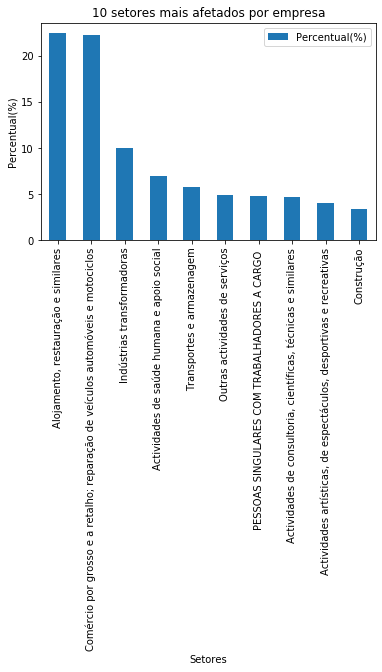

In [18]:
#present a bar chart of the 10 most affected sectors by companies
df_plot10=df_setor.head(10)
df_plot10.plot(kind='bar',x='Setor',y='Percentual(%)')
plt.title('10 setores mais afetados por empresa')
plt.xlabel('Setores')
plt.ylabel('Percentual(%)')
plt.show()

Text(0.5, 0, 'porcentagem total trabalhadores layoff(%)')

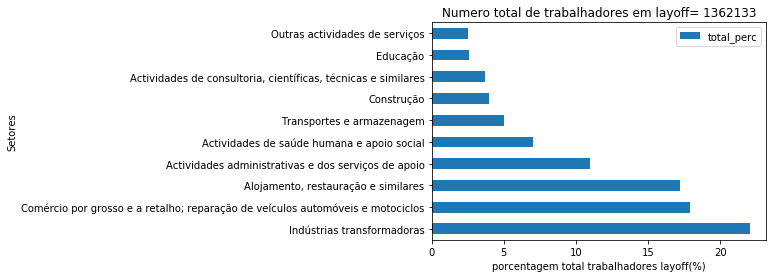

In [21]:
#data analysis by amount of workers
df_workers=df_work[['Setor','Nº TRABALHADORES','Feminino','Masculino']]
df_workers=df_workers.sort_values(by=['Nº TRABALHADORES'],ascending=False)

#Calculate percentage of total workers affected
total_worker=sum(df_workers['Nº TRABALHADORES'])
df_workers['total_perc']=[(float(value) / total_worker) for value in df_workers['Nº TRABALHADORES']]
df_workers['total_perc']=df_workers['total_perc']*100
df_workers['total_perc']=df_workers['total_perc'].round(3)
df_workers

#Calculate percentage of female workers affected
total_female=sum(df_workers['Feminino'])
df_workers['fem_perc']=[(float(value) / total_female) for value in df_workers['Feminino']]
df_workers['fem_perc']=df_workers['fem_perc']*100
df_workers['fem_perc']=df_workers['fem_perc'].round(3)
df_workers

#Calculate percentage of male workers affected
total_male=sum(df_workers['Masculino'])
df_workers['male_perc']=[(float(value) / total_male) for value in df_workers['Masculino']]
df_workers['male_perc']=df_workers['male_perc']*100
df_workers['male_perc']=df_workers['male_perc'].round(3)

#Rearrange colums
df_workers=df_workers[['Setor','Nº TRABALHADORES','total_perc','Feminino','fem_perc','Masculino','male_perc']]

#present a bar chart of the 10 industries that presented a higher amount of workers on layoff
df_work10=df_workers.head(10)
df_work10.plot(kind='barh',x='Setor',y='total_perc')
plt.title('Numero total de trabalhadores em layoff= '+str(total_worker))
plt.ylabel('Setores')
plt.xlabel('porcentagem total trabalhadores layoff(%)')
#plt.show()

Text(0.5, 0, 'Setores')

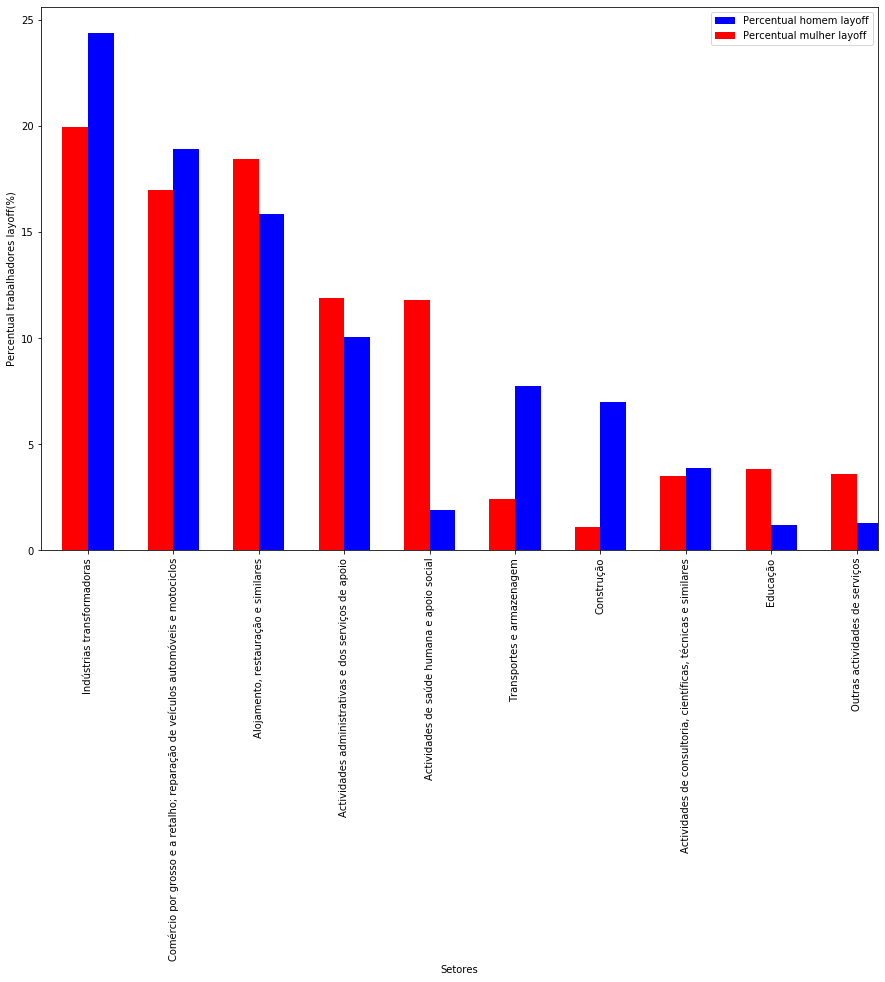

In [22]:
#Present a chart presenting  percentage of women and men layoff
#take men info
df_men=df_work10[['Setor','Masculino','male_perc']]
#take women info
df_women=df_work10[['Setor','Feminino','fem_perc']]

#Create bar chart
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes


width =0.3

df_men.plot(kind='bar',x='Setor', y='male_perc', color='blue', ax=ax, width=width, position=0,label='Percentual homem layoff',figsize=(15, 10))
df_women.plot(kind='bar',x='Setor', y='fem_perc', color='red', ax=ax, width=width, position=1,label='Percentual mulher layoff',figsize=(15, 10))

ax.set_ylabel('Percentual trabalhadores layoff(%)')
ax.set_xlabel('Setores')

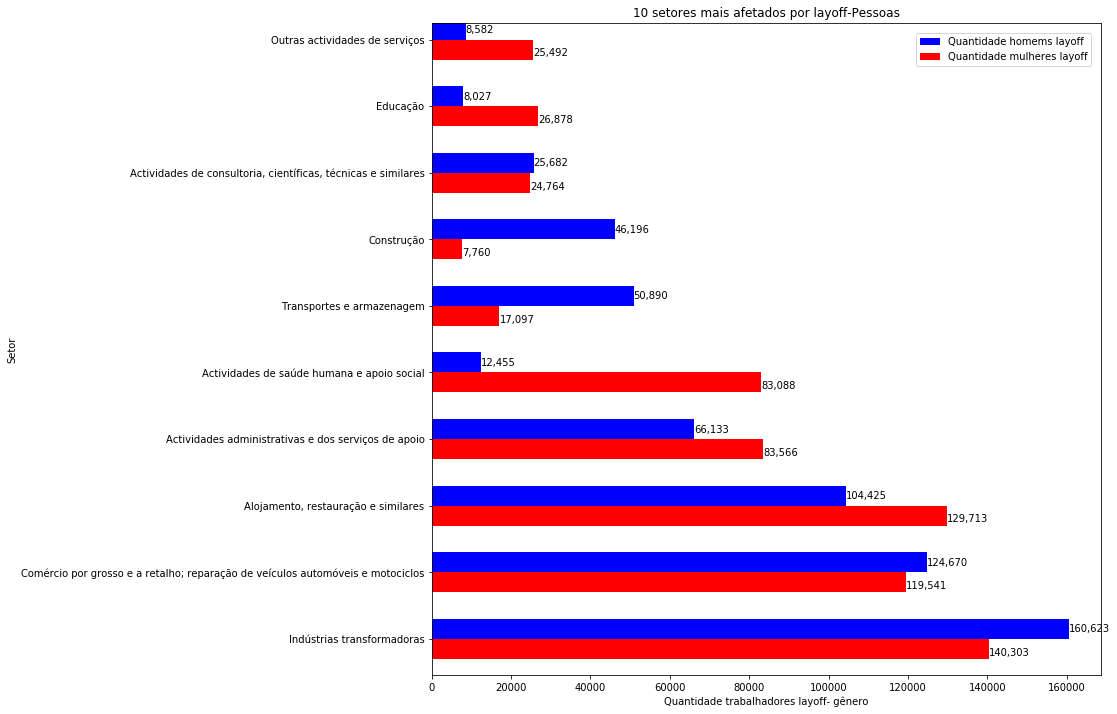

In [23]:
# Extract information relative to top 10 industries for men on layoff
df_label=df_men[['Setor','Masculino']]
df_label=df_label.reset_index()
df_label=df_label.set_index('Setor')
df_label_men=df_label['Masculino']

# Extract information relative to top 10 industries for women on layoff
df_label2=df_women[['Setor','Feminino']]
df_label2=df_label2.reset_index()
df_label2=df_label2.set_index('Setor')
df_label_women=df_label2['Feminino']

#Graphic with 10 most affected sectors 

plt.xlabel('Quantidade trabalhadores layoff- gênero')
plt.ylabel('Setor')
plt.title('10 setores mais afetados por layoff-Pessoas')

# Separation between bars
width =0.3

# print bar chart for men and women
df_label_men.plot(kind='barh', color='blue',  width=width, position=0,label='Percentagem homem layoff',figsize=(12, 12))
df_label_women.plot(kind='barh', color='red', width=width, position=1,label='Percentagem mulher layoff',figsize=(12, 12))

#print legend
gender=['Quantidade homems layoff','Quantidade mulheres layoff']

# annotate value labels to men (amount of unemployed)
for index, value in enumerate(df_label_men): 
    label = format(int(value), ',') 
    plt.annotate(label, xy=(value, index + 0.1), color='black')

    # annotate value labels to women (amount of unemployed)
for index, value in enumerate(df_label_women): 
    label2 = format(int(value), ',') 
    plt.annotate(label2, xy=(value, index -0.25), color='black')

#present legends at top right corner
plt.legend(gender,bbox_to_anchor=(1, 1), loc=1, borderaxespad=1)
#show graph
#plt.show()

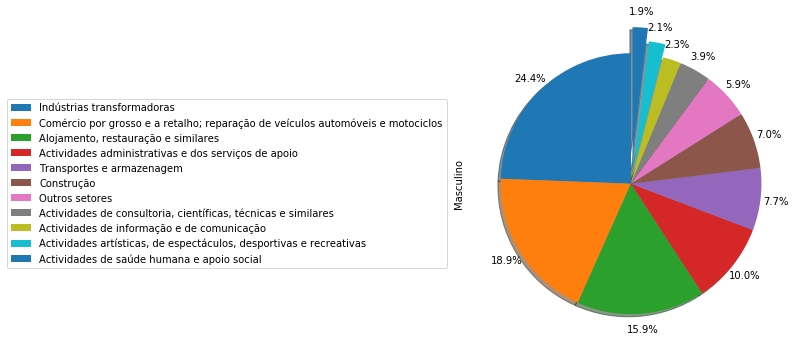

In [24]:
# Make a pie chart with the 10 most affected sectors, plus presenting an 11th sector with the sum of the other sectors affected
#For male situation
#Select the needed information
df_pie=df_workers[['Setor','Masculino']]
#sort values by the number of unemployed males
df_pie=df_pie.sort_values(by=['Masculino'],ascending=False)
#calculate the sum of the other sectors affected
outros_setores=sum(df_pie['Masculino'].tail(11))
#Make a new row with the sum of the rest of sectors affected
new_row=pd.Series(data={'Setor':'Outros setores','index':0,'Masculino':outros_setores})
#Append the new row to the existing information
df_pie=df_pie.append(new_row, ignore_index=True)
#sort values again by number of unemployed males
df_pie=df_pie.sort_values(by=['Masculino'],ascending=False)
#clean the data
df_pie=df_pie.reset_index()
df_pie=df_pie.set_index('Setor')
df_pie=df_pie.drop('index',1)
#select the data to plot and store it in a new dataframe, select the first 11 rows (10 sectors more affected + other sectors)
df_pie_men=df_pie['Masculino']
df_pie_top=df_pie_men.head(11)

#Generate the pie chart
#Generate and explode list to enhance visuals and present the information in a more clear way
explode_list = [0, 0, 0, 0, 0, 0,0,0,0,0.1,0.2] 

#present the pie chart using the dataframe created previously
df_pie_top.plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,    
                            explode=explode_list
                            )
#Present legends for identification of different sectors
plt.legend(df_pie_top.index, loc='center right',bbox_to_anchor=(-0.55, 0, 0.5, 1))

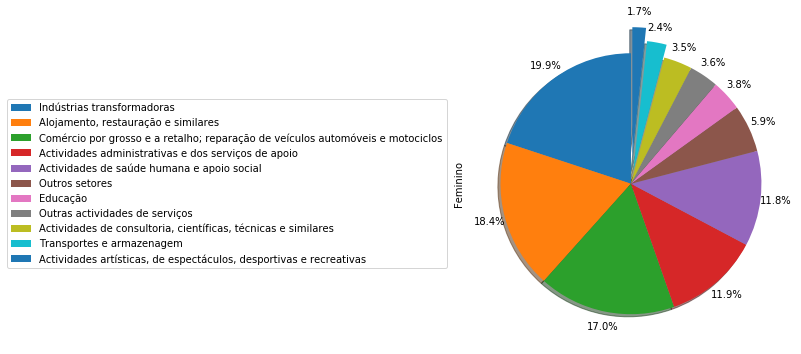

In [25]:
# Make a pie chart with the 10 most affected sectors, plus presenting an 11th sector with the sum of the other sectors affected
#For female situation
#Select the needed information
df_pie_f=df_workers[['Setor','Feminino']]
#sort values by the number of unemployed females
df_pie_f=df_pie_f.sort_values(by=['Feminino'],ascending=False)
#calculate the sum of the other sectors affected
outros_setores=sum(df_pie_f['Feminino'].tail(11))
#Make a new row with the sum of the rest of sectors affected
new_row=pd.Series(data={'Setor':'Outros setores','index':0,'Feminino':outros_setores})
#Append the new row to the existing information
df_pie_f=df_pie_f.append(new_row, ignore_index=True)
#sort values again by number of unemployed females
df_pie_f=df_pie_f.sort_values(by=['Feminino'],ascending=False)
#clean the data
df_pie_f=df_pie_f.reset_index()
df_pie_f=df_pie_f.set_index('Setor')
df_pie_f=df_pie_f.drop('index',1)
#select the data to plot and store it in a new dataframe, select the first 11 rows (10 sectors more affected + other sectors)
df_pie_women=df_pie_f['Feminino']
df_pie_top_w=df_pie_women.head(11)

#Generate the pie chart
#Generate and explode list to enhance visuals and present the information in a more clear way
explode_list = [0, 0, 0, 0, 0, 0,0,0,0,0.1,0.2] 

#present the pie chart using the dataframe created previously
df_pie_top_w.plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,    
                            explode=explode_list
                            )
#Present legends for identification of different sectors
plt.legend(df_pie_top_w.index, loc='center right',bbox_to_anchor=(-0.55, 0, 0.5, 1))

2.2 Analysis by Organization dimension

In [26]:
#ANALYSIS BY ORGANIZATION DIMENSION

#Create a waffle chart to show distribution of affectance by oganization dimension
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_size.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )


In [31]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_size.index.values# categories
values = df_size['Percentual(%)'].round(3)# correponding values of categories

colormap = plt.cm.PRGn # color map class

In [32]:
create_waffle_chart(categories, values, height, width, colormap)

Total number of tiles is 400


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U21')) -> dtype('<U21')

2.3 Data Analysis By Region

In [37]:
#ANALYSIS BY REGION
import json

#import the Portugal Json file
with urlopen('https://raw.githubusercontent.com/deldersveld/topojson/master/countries/portugal/portugal-districts.json') as response:
    portugal_geo = json.load(response)

#Get latitude and longitude of Portugal
Portugalcoordinates=(39.399,-8.224)

#Divide into 2 sections, continental and islands
df_continental=df_region.iloc[0:18]
df_island=df_region.iloc[18:22]

df_continental['Latitude']=['40.644','38.015','41.503','41.805','39.823','40.205','38.566','37.019','40.537','39.744','38.716','39.291',
                         '41.149','39.135','38.524','41.644','41.295','40.657']
df_continental['Longitude']=['-8.6455','-7.865','-8.420','-6.757','-7.491','-8.419','-7.900','7.932','-7.265','-8.807','-9.133',
                            '-7.432','-8.610','-8.405','-8.893','-8.830','-7.746','-7.914']
df_continental['Latitude']=df_continental['Latitude'].astype(float)
df_continental['Longitude']=df_continental['Longitude'].astype(float)

C:\Users\Ana\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\Ana\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Ana\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

### Redução de Actividade TI e MOE

In [40]:
base = alt.Chart(reducao_atividade_byday).mark_bar().encode(
    x='DATA',
).properties(
    width=850
)
red = alt.value('#f54242')
base.encode(y='TI_ParagemTotal').properties(title='TI Paragem Total') #| base.encode(y='POR DIA').properties(title='Por dia')

alt.Chart(...)

### Despedimentos coletivos

In [43]:
base = alt.Chart(despedimentos).mark_bar().encode(
    x='DATA',
).properties(
    width=850
)
red = alt.value('#f54242')
base.encode(y='COLETIVOS_TOTAL').properties(title='COLETIVO TOTAL') #| base.encode(y='POR DIA').properties(title='Por dia')

alt.Chart(...)

In [44]:
base = alt.Chart(despedimentos).mark_bar().encode(
    x='DATA',
).properties(
    width=850
)
red = alt.value('#f54242')
base.encode(y='TRABALHADORES_TOTAL').properties(title='TRABALHADORES TOTAL') #| base.encode(y='POR DIA').properties(title='Por dia')

alt.Chart(...)